# **Feature Selection**
Here we explore methodologies to identify which features are useful provide a higher predictive power to the model. Given a dataset, a model trained on it can depend on features directly on derived features. How do we tell wich features are the most useful? Multiple approaches exist, which are based on simple ideas of univariate analysis to complex multivariate analysis. In univariate analysis we look at how a single feature contribute to the model. Although useful, it does have pitfalls as some features are better together. In multivariate analysis we can tell which features perform well and more importantly which perform well together. Various techniques exist driven differentiated by how information is extracted. When data contains label like the case here, we use supervised techniques, nevetheless, unsupervised techniques can be used for unlabelled data.

Collaborative filtering is built on the assumption that a good way to predict the
preference of an active consumer for a target product is to find other consumers
who have similar preferences and use their votes for that product to make a
prediction.
As noted in the [source page](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/), these techniques can be classified as follows
- **Filter methods:** based on features properties highlighted via univariate analysis

- **Wrapper methods:** With a specific learning algorithm, these methose can perform a greedy search of the best feature by fitting models with possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. 
- **Embedded methods:** Here they aim to combine the power of both filters and wrapper while maintaining reasonable computational cost.
- **Hybrid method:** Hybrid methods basically select features via a global transformation reduces the data to a desided number of dimensions. The new features can bear little or no resemblance to the initial features.



References

Libraries used in the notebook:
* [pandas](https://pandas.pydata.org/docs/),
* [scikit-learn](https://scikit-learn.org/stable/),
* [optbinning](https://github.com/guillermo-navas-palencia/optbinning),
* [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html),
* [category_encoders](https://contrib.scikit-learn.org/category_encoders/)"

In [8]:
import pandas as pd
import numpy as np
import pickle
# import shap
# from optbinning import Scorecard, BinningProcess
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
import category_encoders as ce

Get some toy data

In [2]:
with open(r'C:\Users\nsofinij\Work\Laboratory\Learning\RiskScoring\Scorecards\dev-data.pkl', 'rb') as f:
    df_application = pickle.load(f)

In [3]:
pd.options.display.max_columns = None
df_application.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# format columns to lower case (just for a nice look :) )
df_application.columns = [col.lower() for col in df_application.columns]
df_application.head(2)

,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#working with numerical data
X = df_application.drop('target', axis=1)
Y = df_application.target
numerical_columns = X.select_dtypes(include=np.number).columns.values
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.values

In [9]:
encoder = ce.TargetEncoder()
X_cat = encoder.fit_transform(X[categorical_columns], Y)
X[categorical_columns] = X_cat

C:\Users\nsofinij\Anaconda3\envs\general\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## 4 Embedded Methods:
The challenged we had in previous methods is that filters word with one feature, and wrapper selects a group of feature and then train the model from start to finish. The question is what if some features only present their power in some parameter space. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration. They are also referred to as model based approaches as the features selected depends on the model. [Read more here](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/).
Embedded methods considered here includes
- LASSO Regulaization
- Random Forest
- SHapley Additive exPlanations

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.1 LASSO Regularization
Lasso methods applies regularization which can pernalize a feature differently and at different stages of the training interation process. Here we will use a `SelectFromModel` class. 

In [ ]:
lrg = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
model = feature_selection.SelectFromModel(
    lrg.fit(X_train, y_train),
    prefit=True
)
X_new = model.transform(X_train)

In [ ]:
X_new.shape

In [ ]:
X_t.shape

### 4.2 Random Forest Importance
Random Forest is an ensemble methods that builds many trees and a prediction is made by a concensus aggrement by multiple trees. The performance is measured by how well they improve the purity of the node using Gini impurity.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
#get the importance of the resulting features
rf_imporatance_series = pd.Series(
    rf.feature_importances_, 
    X_train.columns
    ).sort_values(ascending=False)
rf_imporatance_series

In [ ]:
rf_imporatance_series.head()

### 4.3 SHAP Values
SHAP Values (an acronym from SHapley Additive exPlanations) help in breaking down a prediction into components that illustrate the impact of each feature. This could be granular at the level of each instance (single row of data) or aggregated to see the models breakdown according to each feature. For some explanation see [here](https://www.kaggle.com/dansbecker/shap-values).

In [ ]:
#Select numberical features
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
df_application = data[feature_names].fillna(0)
train_X, val_X, train_y, val_y = train_test_split(df_application.drop('target', axis=1), df_application['target'], random_state=1)
model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [ ]:
#Now that we have a model, let's look at the prediction for a single row. Let's use row 3
row_to_check = 3
data_for_prediction = val_X.iloc[row_to_check:row_to_check+1]
model.predict_proba(data_for_prediction)

In [ ]:
val_X.iloc[row_to_check:row_to_check+1]

This customer is 91% likely to be a good customer according to the model. Now let's see is the main driver behind the prediction

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap_values

The shap values above is a 2D array. First is the values for negtive outcome (bad customer) and the second the values for the positive outcome ( good  customer). Since we are looking at prediction of negative outcome we look at the second array

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
explainer2 = shap.Explainer(model)
shap_values2 = explainer2(val_X.head(50))

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values2[0])

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values2[:,"RM"], color=shap_values2)

In the explainer we us <code> shap.TreeExplainer() </code> as we have a tree. This is optimized to work for tree-base algorithms. We can use other specialised explainer can be view in the [official shap page](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html), including <code> shap.Linear()</code>.

__Global Interpretation__:

In the demonstration above, we showed a break down for an individual. Now, let's look at what happens when we aggregate to the model level. Basically we waht to how what is driving the overall model performance (feature importance)

In [ ]:
%%time
shap_values = explainer.shap_values(val_X.head(50))

In [ ]:
# Make plot for top 10.
shap.summary_plot(shap_values[1], val_X.head(50))

The plot is made of many dots, each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

For example, the point in the upper left is for an individual with few days at worm, reducing the prediction by 0.05.
The plot visibily shows that:
- The model ignored flag_document_14.
- Higer values of days_birth caused higher predictions and lower values lower predictions

According to SHAP the top four features are 
- days_birth
- days_employed
- days_in_publish
- flag_document_3


In [ ]:
# # Using kernel explainer
# k_explainer = shap.KernelExplainer(model.predict_proba, train_X)
# # Calculate Shap values
# k_shap_values = k_explainer.shap_values(data_for_prediction)
# shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(model, val_X.head(50), ["DAYS_BIRTH", "DAYS_EMPLOYED"], ax=ax)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit_transform(data['AMT_INCOME_TOTAL'].head())

In [ ]:
data.head()

### 4.4 Cluster Analysis

In [25]:
import saspy
%run ../src/data_utils.py #Some utilities
sess = saspy.SASsession(
        cfgfile=mk.saspy_file_path,
        cfgname=mk.saspy_cfgname
    )

SAS Connection established. Subprocess id is 21392



In [26]:
dataset_params = mk.dataset2
sess.saslib(dataset_params['lib_name'], path=dataset_params['path'])
lgd_data = sess.sd2df(
    dataset_params['table_name'], 
    libref=dataset_params['lib_name'], 
    method="CSV"
    )


5                                                          The SAS System                     Tuesday, 23 November, 2021 04:14:00 PM

24         
25         libname LGDCFL    '/sasdata/FCC/Teams/PortfolioModelDevelopment/LGDCFL'  ;
NOTE: Libref LGDCFL was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: /sasdata/FCC/Teams/PortfolioModelDevelopment/LGDCFL
26         
27         
28         

6                                                          The SAS System                     Tuesday, 23 November, 2021 04:14:00 PM

29         


In [27]:
#working with numerical data
X = lgd_data.drop('LGD_bad_ind', axis=1)
Y = lgd_data.LGD_bad_ind
numerical_columns = X.select_dtypes(include=np.number).columns.values
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.values

In [28]:
encoder = ce.TargetEncoder()
X_cat = encoder.fit_transform(X[categorical_columns], Y)
X[categorical_columns] = X_cat

C:\Users\nsofinij\Anaconda3\envs\general\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [29]:
from sklearn.preprocessing import normalize
import pandas as pd
data_scaled = normalize(X.fillna(0))
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,cf_utilization,province,NAICS_INDUSTRY_CD,naics_num,lgd_entcode,CF_TOT_PDUE_OVER_500_DOLS,CF_TOT_PRIORS_BAL_AMT,CF_TOT_PDUE_AMT,CF_AGMTCUR_LIMIT_AMT,CF_AGMTCUR_ORIG_AMT,CF_APRVL_PROCESS_EN,CF_CHATTEL_SECURITY_AMT,CF_REAL_PRPTY_SECURITY_AMT,CF_QUOTA_SECURITY_AMT,CF_FCC_PRIORS_BAL_AMT,CF_NON_FCC_PRIORS_BAL_AMT,CF_SECURITY_TYPE_EN,CF_STRTCH_DEBT_TYPE_EN_DESC,CF_UNEXPIRED_UNDISBD_FUNDS_AMT,B1_BUSN_MATURITY_TYPE_EN,B1_CONNECTED_EXPSR_AMT,B1_SCNDRY_INDUSTRY_CLASS_EN,B1_TIMES_NSF_IN_24_MONTHS_CNT,cf_purp,Bus_div_cd,CUST_EXP_5YR,SUBNAICSDESCRIPTION,DISTRICTNAME,TOTAL_PRIOR_CHARGES,TOTSECURITY,Secured_TO,UnderSecured_TO,UnSecured_TO,CLTRL_AGMNT_TYP_EN_DESC,APRVL_PROCESS_EN_DESC,CR_FAC_SECURITY_TYPE_EN_DESC,CR_FAC_STS_EN_DESC,STRTCH_DEBT_TYPE_EN_DESC,QUOTA_SECURITY_AMT,REAL_PRPTY_SECURITY_AMT,CHATTEL_SECURITY_AMT,AGMTCUR_CR_FAC_AVAIL_CR_AMT,AGMTCUR_CR_FAC_LIMIT_AMT,BRP_SCOR,BEACON_SCOR,fcc_priors,other_priors,CHATTEL_SEC,LAND_SEC,QUOTA_SEC,tot_priors_per_sec,CRED_FCLTY_TO_SEC_RATIO,leverage_ratio,bal_sheet_type,re_qt_per,tot_sec,TMS_NSF,CDS_score,ERS_score,ADSCR,DER,CRED_FCLTY_TO_EQUITY,TOT_EQUITY,Customer_location,SCORE,lev_ratio,AGP1_AGV0,lev_ratio_1
0,5.871748e-08,5.320846e-09,3.209406e-08,0.656592,1.039111e-08,0.0,0.0,0.0,0.064843,0.210453,3.251866e-09,0.0,0.0,0.0,0.0,0.0,4.116888e-09,5.719595e-09,0.0,7.817842e-09,0.05972,4.908757e-09,0.0,4.279089e-09,1.033922e-08,0.000013,1.100591e-08,8.926105e-09,0.0,0.517859,0.058717,0.0,0.0,4.142340e-09,3.251866e-09,4.116888e-09,4.464337e-09,5.719595e-09,0.0,0.0,0.0,0.005185,0.064843,0.0,0.002104,0.019409,0.0,0.104519,0.034472,0.0,0.019409,8.890702e-08,3.700517e-07,2.104529e-07,2.651048e-08,0.138991,0.0,0.0,0.002104,2.963833e-07,6.762571e-07,2.704618e-08,0.456895,8.300813e-09,0.0,0.002105,0.0,0.004209
1,5.871748e-08,5.320846e-09,3.209406e-08,0.656592,1.039111e-08,0.0,0.0,0.0,0.064843,0.210453,3.251866e-09,0.0,0.0,0.0,0.0,0.0,4.116888e-09,5.719595e-09,0.0,7.817842e-09,0.05972,4.908757e-09,0.0,4.279089e-09,1.033922e-08,0.000013,1.100591e-08,8.926105e-09,0.0,0.517859,0.058717,0.0,0.0,4.142340e-09,3.251866e-09,4.116888e-09,4.464337e-09,5.719595e-09,0.0,0.0,0.0,0.005185,0.064843,0.0,0.002104,0.019409,0.0,0.104519,0.034472,0.0,0.019409,8.890702e-08,3.700517e-07,2.104529e-07,2.651048e-08,0.138991,0.0,0.0,0.002104,2.963833e-07,6.762571e-07,2.704618e-08,0.456895,8.300813e-09,0.0,0.002105,0.0,0.004209
2,5.871748e-08,5.320846e-09,3.209406e-08,0.656592,1.039111e-08,0.0,0.0,0.0,0.064843,0.210453,3.251866e-09,0.0,0.0,0.0,0.0,0.0,4.116888e-09,5.719595e-09,0.0,7.817842e-09,0.05972,4.908757e-09,0.0,4.279089e-09,1.033922e-08,0.000013,1.100591e-08,8.926105e-09,0.0,0.517859,0.058717,0.0,0.0,4.142340e-09,3.251866e-09,4.116888e-09,4.464337e-09,5.719595e-09,0.0,0.0,0.0,0.005185,0.064843,0.0,0.002104,0.019409,0.0,0.104519,0.034472,0.0,0.019409,8.890702e-08,3.700517e-07,2.104529e-07,2.651048e-08,0.138991,0.0,0.0,0.002104,2.963833e-07,6.762571e-07,2.704618e-08,0.456895,8.300813e-09,0.0,0.002105,0.0,0.004209
3,5.871748e-08,5.320846e-09,3.209406e-08,0.656592,1.039111e-08,0.0,0.0,0.0,0.064843,0.210453,3.251866e-09,0.0,0.0,0.0,0.0,0.0,4.116888e-09,5.719595e-09,0.0,7.817842e-09,0.05972,4.908757e-09,0.0,4.279089e-09,1.033922e-08,0.000013,1.100591e-08,8.926105e-09,0.0,0.517859,0.058717,0.0,0.0,4.142340e-09,3.251866e-09,4.116888e-09,4.464337e-09,5.719595e-09,0.0,0.0,0.0,0.005185,0.064843,0.0,0.002104,0.019409,0.0,0.104519,0.034472,0.0,0.019409,8.890702e-08,3.700517e-07,2.104529e-07,2.651048e-08,0.138991,0.0,0.0,0.002104,2.963833e-07,6.762571e-07,2.704618e-08,0.456895,8.300813e-09,0.0,0.002105,0.0,0.004209
4,5.871748e-08,5.320846e-09,3.209406e-08,0.656592,1.039111e-08,0.0,0.0,0.0,0.064843,0.210453,3.251866e-09,0.0,0.0,0.0,0.0,0.0,4.116888e-09,5.719595e-09,0.0,7.817842e-09,0.05972,4.908757e-09,0.0,4.279089e-09,1.033922e-08,0.000013,1.100591e-08,8.926105e-09,0.0,0.517859,0.058717,0.0,0.0,4.142340e-09,3.251866e-09,4.116888e-09,4.464337e-09,5.719595e-09,0.0,0.0,0.0,0.005185,0.064843,0.0,0.002104,0.019409,0.0,0.104519,0.034472,0.0,0.

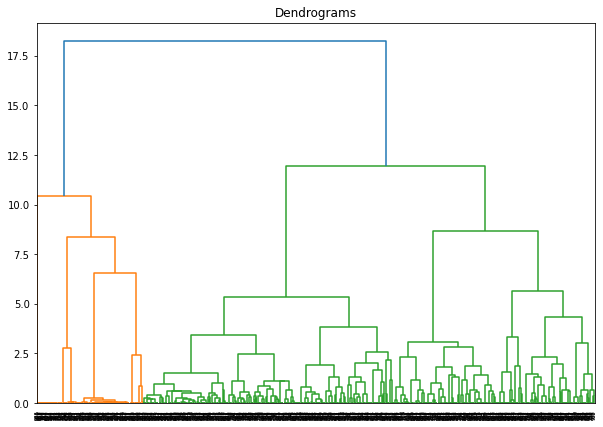

In [30]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled.sample(1000, weights=Y), method='ward'))

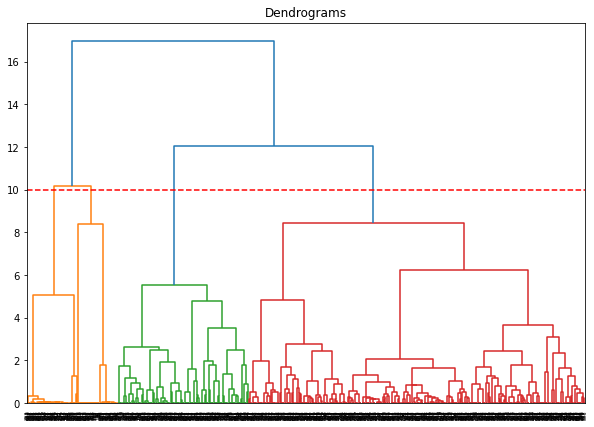

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled.sample(1000, weights=Y), method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
_ = cluster.fit_predict(data_scaled.sample(10000, weights=Y))

We can see the values of 0s and 1s in the output since we defined 24 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster and so on. Let’s now visualize the two clusters:m

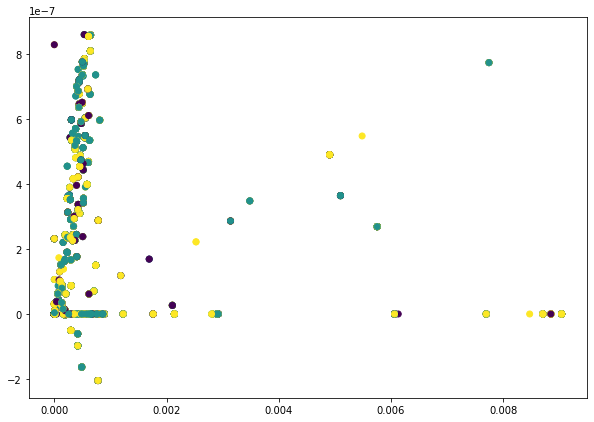

In [35]:
d = data_scaled.sample(10000, weights=Y)
plt.figure(figsize=(10, 7))  
plt.scatter(d['ERS_score'], d['re_qt_per'], c=cluster.labels_) 

In [18]:
set(cluster.labels_)

{0, 1}